In [13]:
# check scikit-learn version
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor


In [14]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [15]:
#The following script divides data into attributes and labels:
X = dataset.iloc[:, [1,2,3,5,6,7]].values
y = dataset.iloc[:, [0,4]].values


loss_per_fold_0 = []
loss_per_fold_1 = []


#Divide the data into training and testing sets for KFold Cross validaton loop
#Define the K-fold Cross Validator
cv = KFold(n_splits=392, shuffle=False)
cv.get_n_splits(X)
print(cv,"\n")

# K-fold Cross Validation model evaluation
fold_no = 1


for train_index, test_index in cv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Feature Scaling
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    # define model
    model = DecisionTreeRegressor()
    # fit model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Generate generalization metrics
    
    print(f'loss for fold {fold_no}: \n Regressor 1: {metrics.mean_absolute_error(y_test[:,0], y_pred[:,0])}\n Regressor 2:{metrics.mean_absolute_error(y_test[:,1], y_pred[:,1])}\n\n')

    loss_per_fold_0.append(metrics.mean_absolute_error(y_test[:,0], y_pred[:,0]))
    loss_per_fold_1.append(metrics.mean_absolute_error(y_test[:,1], y_pred[:,1]))

    # Increase fold number
    fold_no = fold_no + 1

KFold(n_splits=392, random_state=None, shuffle=False) 

loss for fold 1: 
 Regressor 1: 0.10000000000000142
 Regressor 2:299.0


loss for fold 2: 
 Regressor 1: 1.0
 Regressor 2:516.0


loss for fold 3: 
 Regressor 1: 3.0
 Regressor 2:37.0


loss for fold 4: 
 Regressor 1: 2.0
 Regressor 2:71.0


loss for fold 5: 
 Regressor 1: 0.0
 Regressor 2:223.0


loss for fold 6: 
 Regressor 1: 1.0
 Regressor 2:585.5


loss for fold 7: 
 Regressor 1: 0.0
 Regressor 2:42.0


loss for fold 8: 
 Regressor 1: 0.0
 Regressor 2:42.0


loss for fold 9: 
 Regressor 1: 0.0
 Regressor 2:1339.0


loss for fold 10: 
 Regressor 1: 1.0
 Regressor 2:462.0


loss for fold 11: 
 Regressor 1: 0.0
 Regressor 2:130.0


loss for fold 12: 
 Regressor 1: 1.0
 Regressor 2:152.0


loss for fold 13: 
 Regressor 1: 1.0
 Regressor 2:593.0


loss for fold 14: 
 Regressor 1: 0.0
 Regressor 2:1339.0


loss for fold 15: 
 Regressor 1: 0.0
 Regressor 2:94.0


loss for fold 16: 
 Regressor 1: 4.0
 Regressor 2:59.0


loss for fold

In [16]:
print('Average scores for all folds:')
print(f'> Mean loss fisrt regressor: {np.mean(loss_per_fold_0)}')
print(f'> Mean loss fisrt regressor: {np.mean(loss_per_fold_1)}')
print('------------------------------------------------------------------------')

Average scores for all folds:
> Mean loss fisrt regressor: 2.9142857142857146
> Mean loss fisrt regressor: 193.2091836734694
------------------------------------------------------------------------


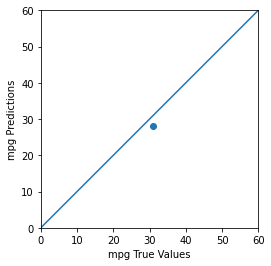

In [17]:

Pred_mpg = y_pred[:,0]
test_mpg = y_test[:,0]
Pred_Weight = y_pred[:,1]
test_Weight = y_test[:,1]

a = plt.axes(aspect='equal')
plt.scatter(test_mpg, Pred_mpg)
plt.xlabel('mpg True Values')
plt.ylabel('mpg Predictions')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


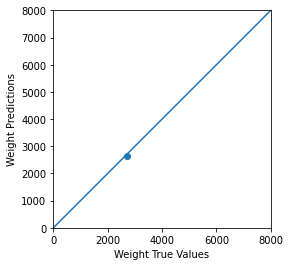

In [18]:
a = plt.axes(aspect='equal')
plt.scatter(test_Weight, Pred_Weight)
plt.xlabel('Weight True Values')
plt.ylabel('Weight Predictions')
lims = [0, 8000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)